In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
x1 = pd.DataFrame(df.iloc[:,0])
y1 = pd.DataFrame(df.iloc[:,7])
x2 = df.iloc[:,[0,3,4]]
y2 = pd.DataFrame(df.iloc[:,7])

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly4 = PolynomialFeatures(degree = 4)

In [8]:
x1

,Age
0,40
1,49
2,37
3,48
4,54
...,...
913,45
914,68
915,57
916,57


In [9]:
x1_poly2 = poly2.fit_transform(x1)
x1_poly3 = poly3.fit_transform(x1)
x1_poly4 = poly4.fit_transform(x1)

In [10]:
print(x1_poly2,x1_poly3,x1_poly4)

[[1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.900e+01 2.401e+03]
 [1.000e+00 3.700e+01 1.369e+03]
 ...
 [1.000e+00 5.700e+01 3.249e+03]
 [1.000e+00 5.700e+01 3.249e+03]
 [1.000e+00 3.800e+01 1.444e+03]] [[1.00000e+00 4.00000e+01 1.60000e+03 6.40000e+04]
 [1.00000e+00 4.90000e+01 2.40100e+03 1.17649e+05]
 [1.00000e+00 3.70000e+01 1.36900e+03 5.06530e+04]
 ...
 [1.00000e+00 5.70000e+01 3.24900e+03 1.85193e+05]
 [1.00000e+00 5.70000e+01 3.24900e+03 1.85193e+05]
 [1.00000e+00 3.80000e+01 1.44400e+03 5.48720e+04]] [[1.0000000e+00 4.0000000e+01 1.6000000e+03 6.4000000e+04 2.5600000e+06]
 [1.0000000e+00 4.9000000e+01 2.4010000e+03 1.1764900e+05 5.7648010e+06]
 [1.0000000e+00 3.7000000e+01 1.3690000e+03 5.0653000e+04 1.8741610e+06]
 ...
 [1.0000000e+00 5.7000000e+01 3.2490000e+03 1.8519300e+05 1.0556001e+07]
 [1.0000000e+00 5.7000000e+01 3.2490000e+03 1.8519300e+05 1.0556001e+07]
 [1.0000000e+00 3.8000000e+01 1.4440000e+03 5.4872000e+04 2.0851360e+06]]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

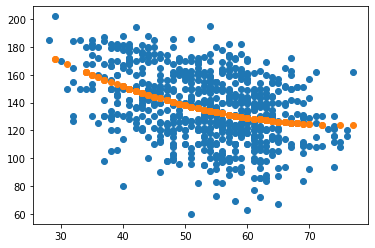

In [12]:
reg1 = LinearRegression()
xtr1,xte1,ytr1,yte1 = train_test_split(x1,y1)
plt.scatter(xtr1,ytr1)
xtr1 = poly2.fit_transform(xtr1)
reg1.fit(xtr1,ytr1)
plt.scatter(xte1,reg1.predict(poly2.fit_transform(xte1)))

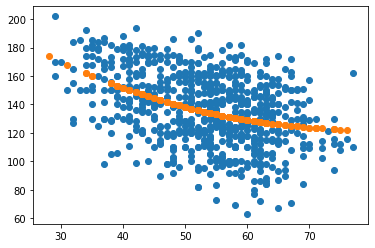

In [13]:
reg2 = LinearRegression()
xtr1,xte1,ytr1,yte1 = train_test_split(x1,y1)
plt.scatter(xtr1,ytr1)
xtr1 = poly3.fit_transform(xtr1)
reg2.fit(xtr1,ytr1)
plt.scatter(xte1,reg2.predict(poly3.fit_transform(xte1)))

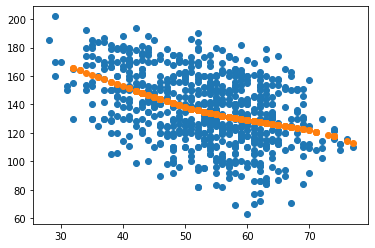

In [14]:
reg3 = LinearRegression()
xtr1,xte1,ytr1,yte1 = train_test_split(x1,y1)
plt.scatter(xtr1,ytr1)
xtr1 = poly4.fit_transform(xtr1)
reg3.fit(xtr1,ytr1)
plt.scatter(xte1,reg3.predict(poly4.fit_transform(xte1)))

In [16]:
reg4 = LinearRegression()
xtr2,xte2,ytr2,yte2=train_test_split(x2,y2)
xtr2 = poly4.fit_transform(xtr2)
reg4.fit(xtr2,ytr2)

LinearRegression()

In [18]:
y_pred=reg4.predict(poly4.fit_transform(xte2))

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [22]:
print(mean_absolute_error(yte2,y_pred))
print(mean_squared_error(yte2,y_pred))
print(r2_score(yte2,y_pred))

21.041072421191064
758.6862067842476
-0.1511572576940612
